In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/BhargavArunkumar/ExploratoryDataAnalysis/main/Amazon%20Data/Data/bestsellers%20with%20categories.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

## Outlier Analysis

In [7]:
df.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
1%,3.900000,465.390000,0.000000,2009.000000
5%,4.200000,1278.950000,4.000000,2009.000000
10%,4.300000,1922.500000,5.000000,2010.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000


In [8]:
def outlier(df):
    outlie=[]
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    up_q=q3+1.5*iqr
    low_q=q1-1.5*iqr
    for x in df:
        if x > up_q or x< low_q:
            outlie.append(x)
    print('The outliers are: ', outlie)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


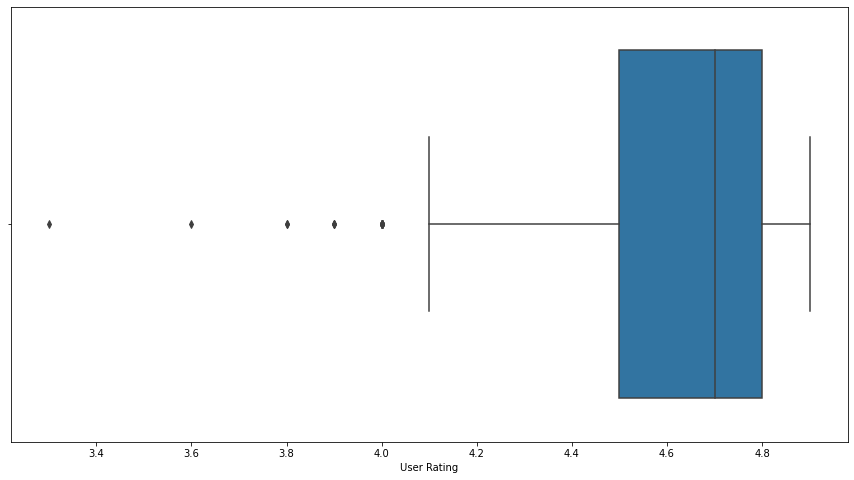

In [9]:
plt.figure(figsize = (15, 8))
sns.boxplot(df['User Rating'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


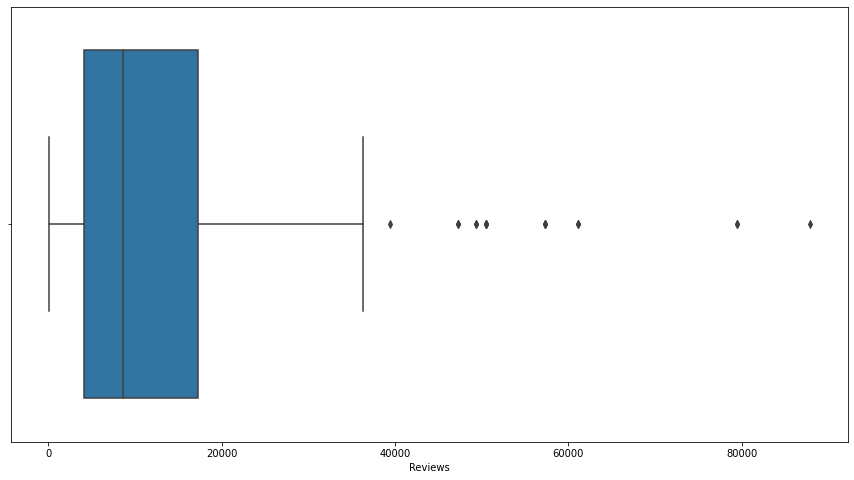

In [10]:
plt.figure(figsize = (15, 8))
sns.boxplot(df['Reviews'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


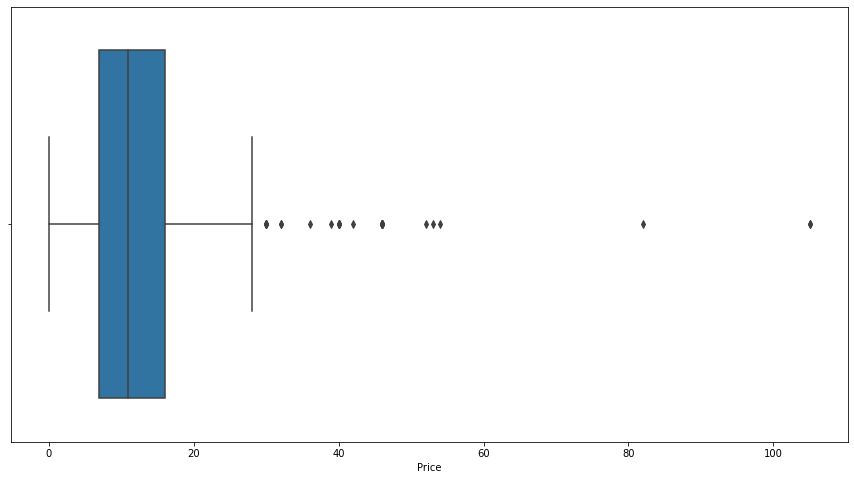

In [11]:
plt.figure(figsize = (15, 8))
sns.boxplot(df['Price'])
plt.show()

In [12]:
outlier(df['User Rating'])

The outliers are:  [3.9, 3.8, 3.8, 3.6, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.3, 4.0, 3.9, 3.9]


In [13]:
outlier(df['Reviews'])

The outliers are:  [61133, 61133, 47265, 47265, 57271, 57271, 57271, 50482, 50482, 50482, 50482, 79446, 79446, 39459, 49288, 49288, 87841]


In [14]:
outlier(df['Price'])

The outliers are:  [30, 32, 105, 105, 32, 54, 30, 30, 52, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 39, 53, 30, 30, 40, 40, 40, 40, 40, 36, 82, 42]


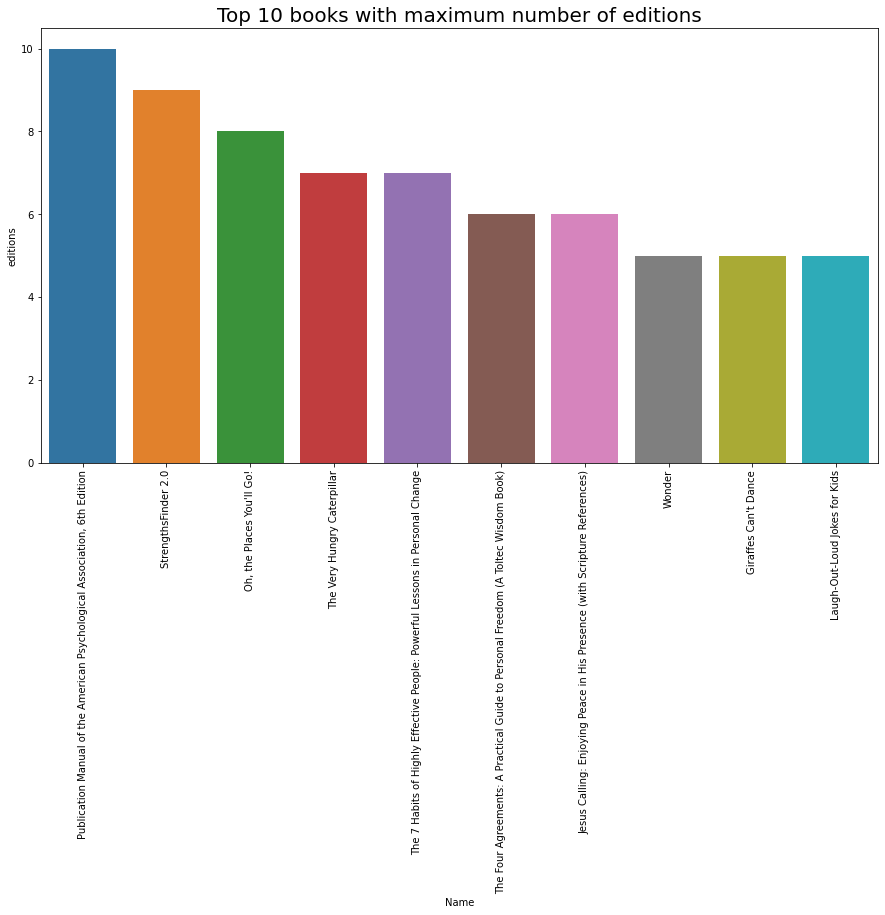

In [15]:
book_edition=df['Name'].value_counts().sort_values(ascending=False)[0:10].reset_index()
book_edition.columns=['Name','editions']
plt.figure(figsize=(15,8))
sns.barplot(x=book_edition['Name'],y=book_edition['editions'])
plt.xticks(rotation=90)
plt.title('Top 10 books with maximum number of editions',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


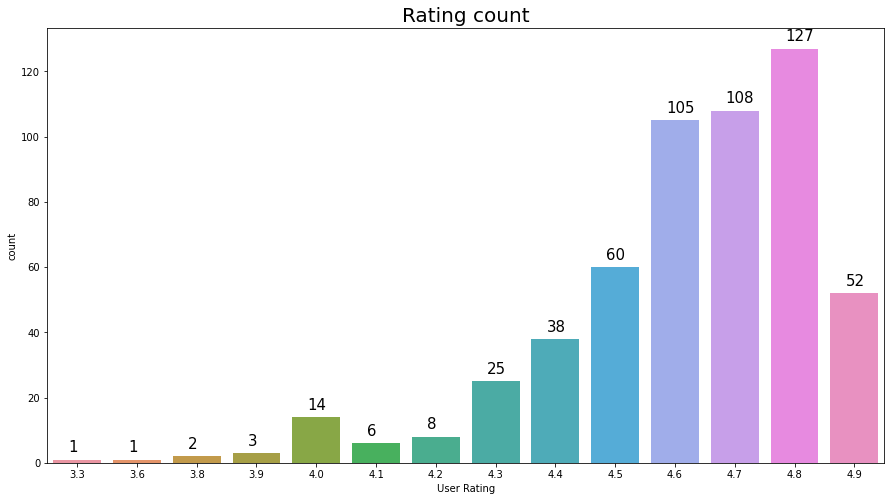

In [16]:
plt.figure(figsize=(15,8))
ax=sns.countplot(df['User Rating'])
plt.title('Rating count',fontsize=20)



for x in ax.patches:
    ax.text(x.get_x()+.25,x.get_height()+2.3,str(int((x.get_height()))),
            rotation=0,fontsize=15,color='black')

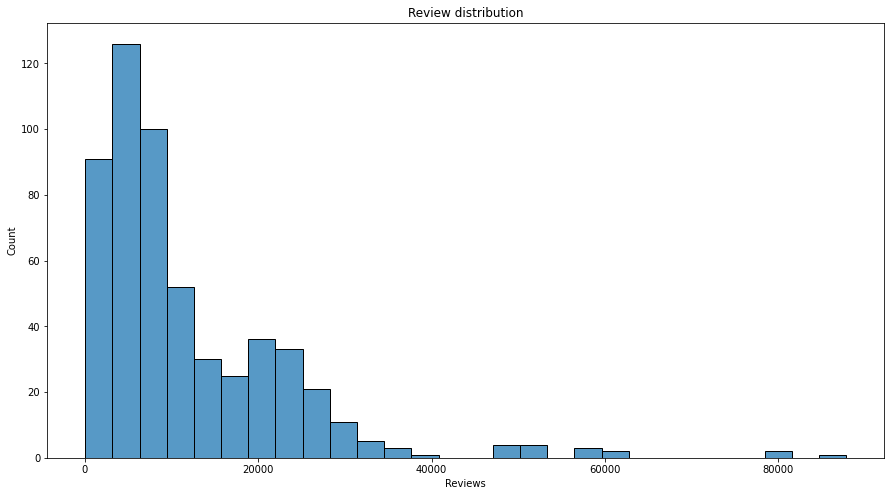

In [17]:
plt.figure(figsize=(15,8))
sns.histplot(df['Reviews'])
plt.title('Review distribution')
plt.show()

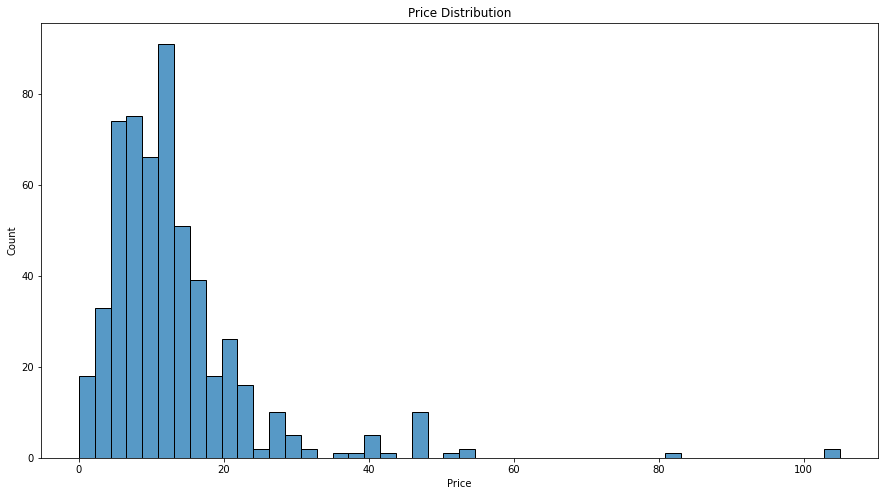

In [18]:
plt.figure(figsize=(15,8))
sns.histplot(df['Price'])

plt.title('Price Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


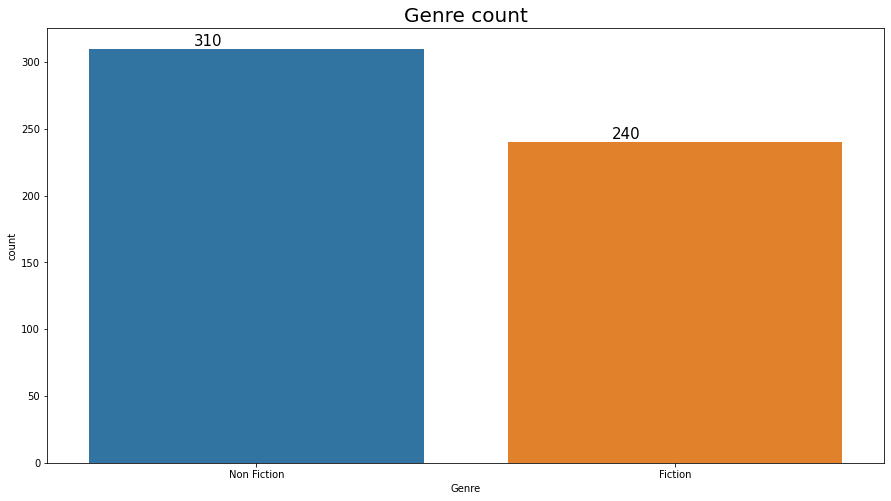

In [19]:
plt.figure(figsize=(15,8))
ax=sns.countplot(df['Genre'])
plt.title('Genre count',fontsize=20)



for x in ax.patches:
    ax.text(x.get_x()+.25,x.get_height()+2.3,str(int((x.get_height()))),
            rotation=0,fontsize=15,color='black')

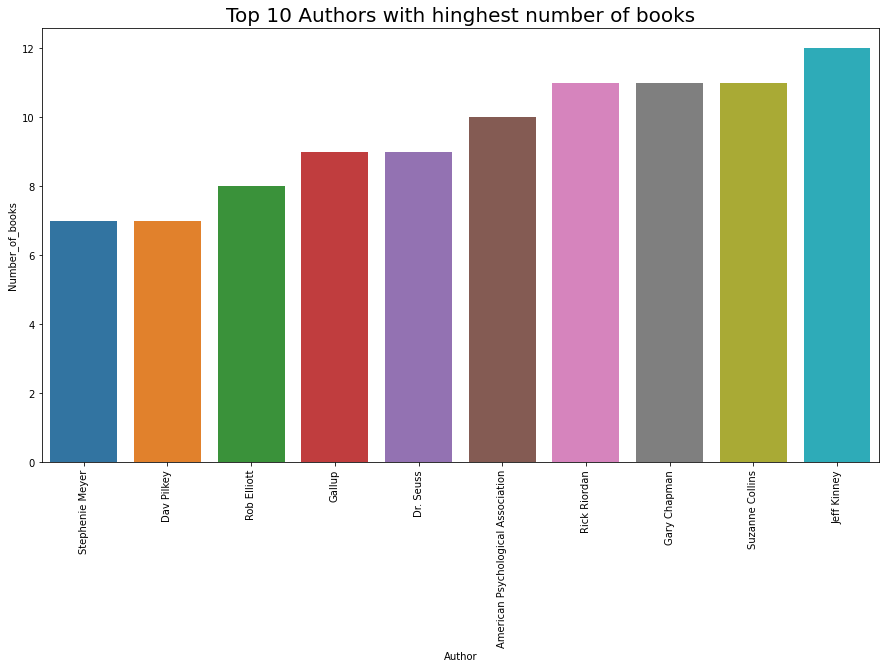

In [20]:
authors_book_count=df['Author'].value_counts().sort_values()[-10:].reset_index()
authors_book_count.columns=['Author','Number_of_books']
plt.figure(figsize=(15,8))
ax=sns.barplot(x=authors_book_count['Author'],y=authors_book_count['Number_of_books'])
plt.xticks(rotation=90)
plt.title('Top 10 Authors with hinghest number of books',fontsize=20)
plt.show()

for x in ax.patches:
    ax.text(x.get_x()+.25,x.get_height()+2.3,str(int((x.get_height()))),
            rotation=0,fontsize=12,color='black')

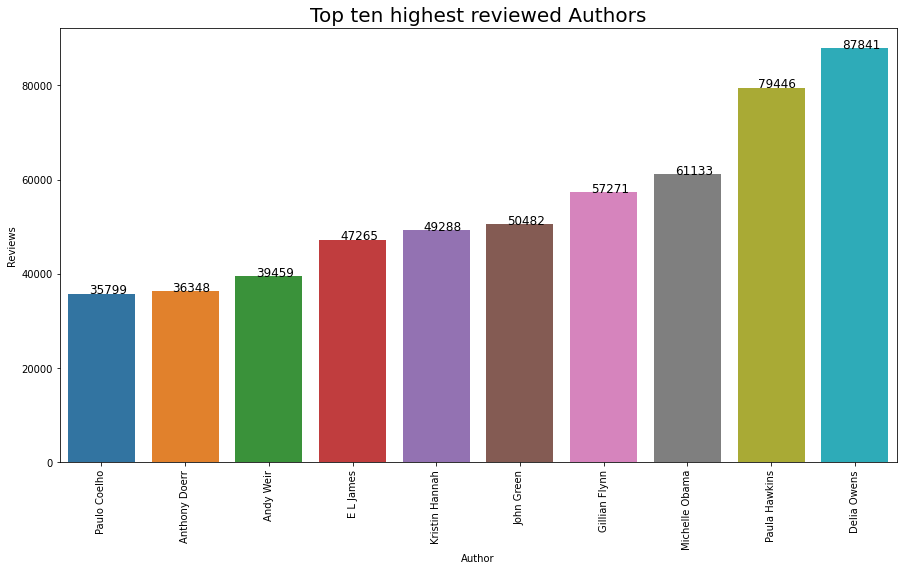

In [21]:
author_reviews=df.groupby(df['Author'])['Reviews'].max().sort_values()[-10:].reset_index()
plt.figure(figsize=(15,8))
ax=sns.barplot(x=author_reviews['Author'],y=author_reviews['Reviews'])
plt.xticks(rotation=90)
plt.title("Top ten highest reviewed Authors",fontsize=20)

for x in ax.patches:
    ax.text(x.get_x()+.25,x.get_height()+2.3,str(int((x.get_height()))),
            rotation=0,fontsize=12,color='black')

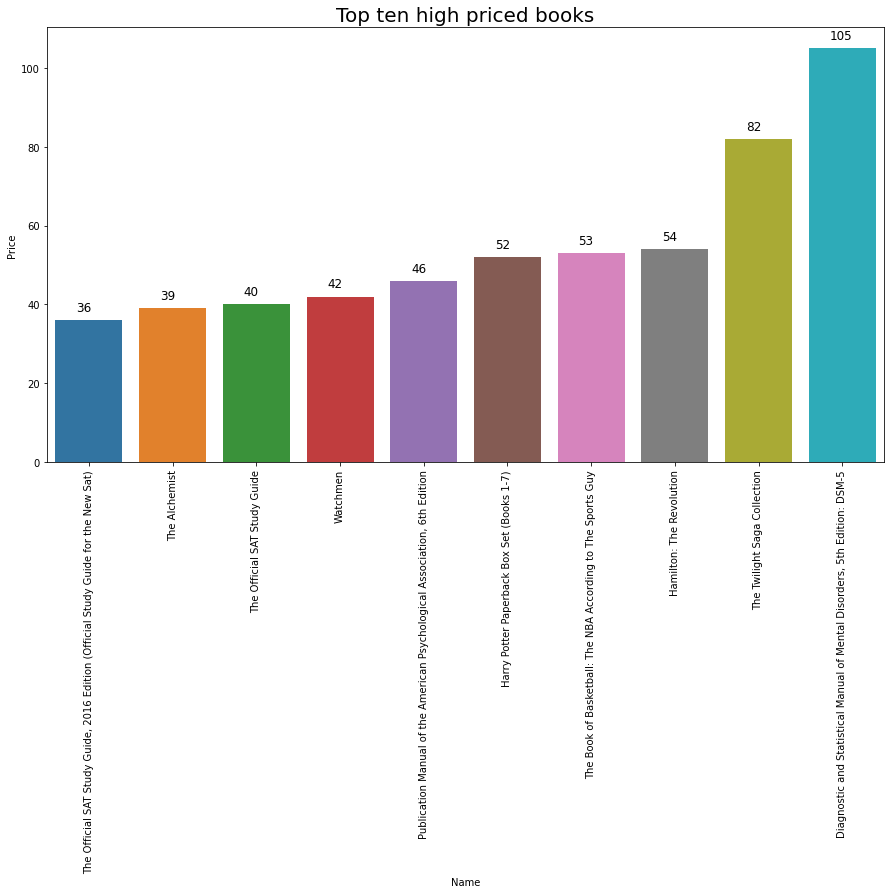

In [22]:
high_price = df.groupby(df['Name'])['Price'].max().sort_values()[-10:].reset_index()
plt.figure(figsize=(15,8))
ax=sns.barplot(x=high_price['Name'],y=high_price['Price'])
plt.xticks(rotation=90)
plt.title("Top ten high priced books",fontsize=20)

for x in ax.patches:
    ax.text(x.get_x()+.25,x.get_height()+2.3,str(int((x.get_height()))),
            rotation=0,fontsize=12,color='black')

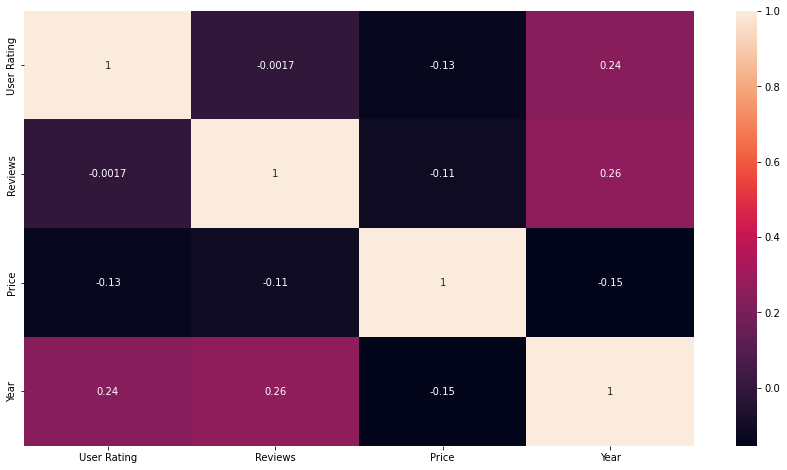

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

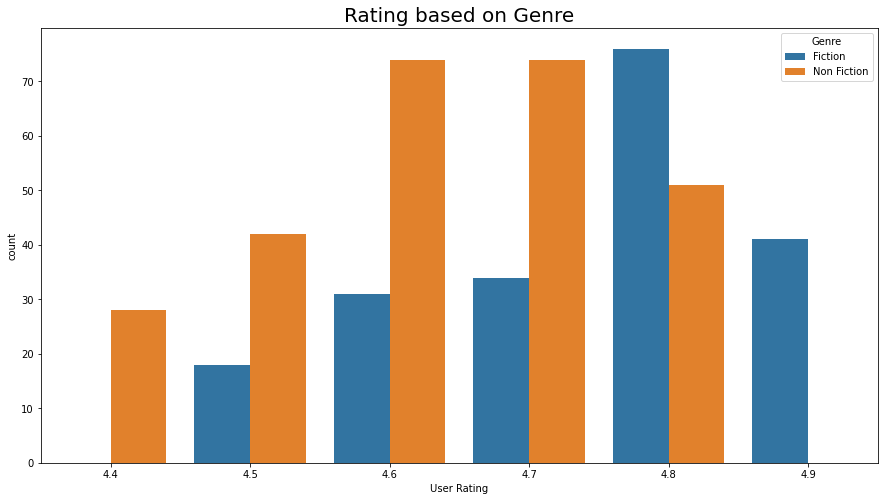

In [24]:
genre_count =df[['Genre','User Rating']].value_counts().sort_values()[-10:].reset_index()
genre_count.columns=['Genre','User Rating','count']
plt.figure(figsize=(15,8))
ax = sns.barplot(hue=genre_count['Genre'],x=genre_count['User Rating'],y=genre_count['count'])
plt.title('Rating based on Genre',fontsize=20)
plt.show()

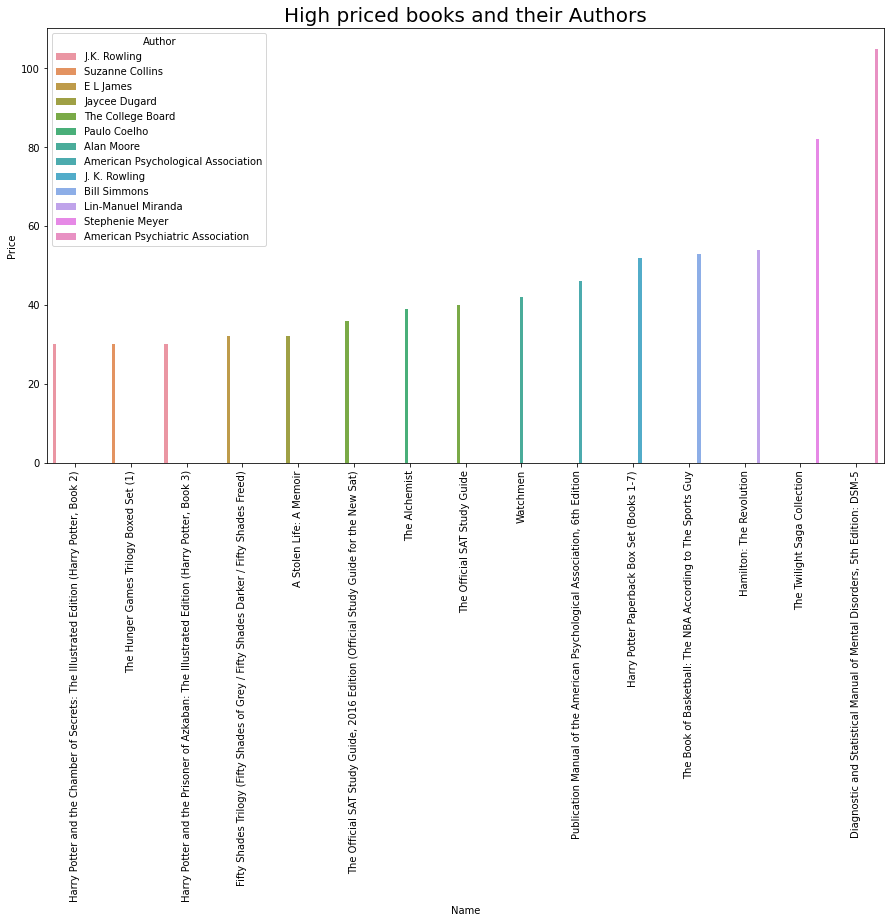

In [25]:
high_price =df[['Name','Price','Author']].sort_values(by = 'Price')[-30:].reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(hue=high_price['Author'],x=high_price['Name'],y=high_price['Price'])
plt.xticks(rotation=90)
plt.title('High priced books and their Authors',fontsize=20)
plt.show()

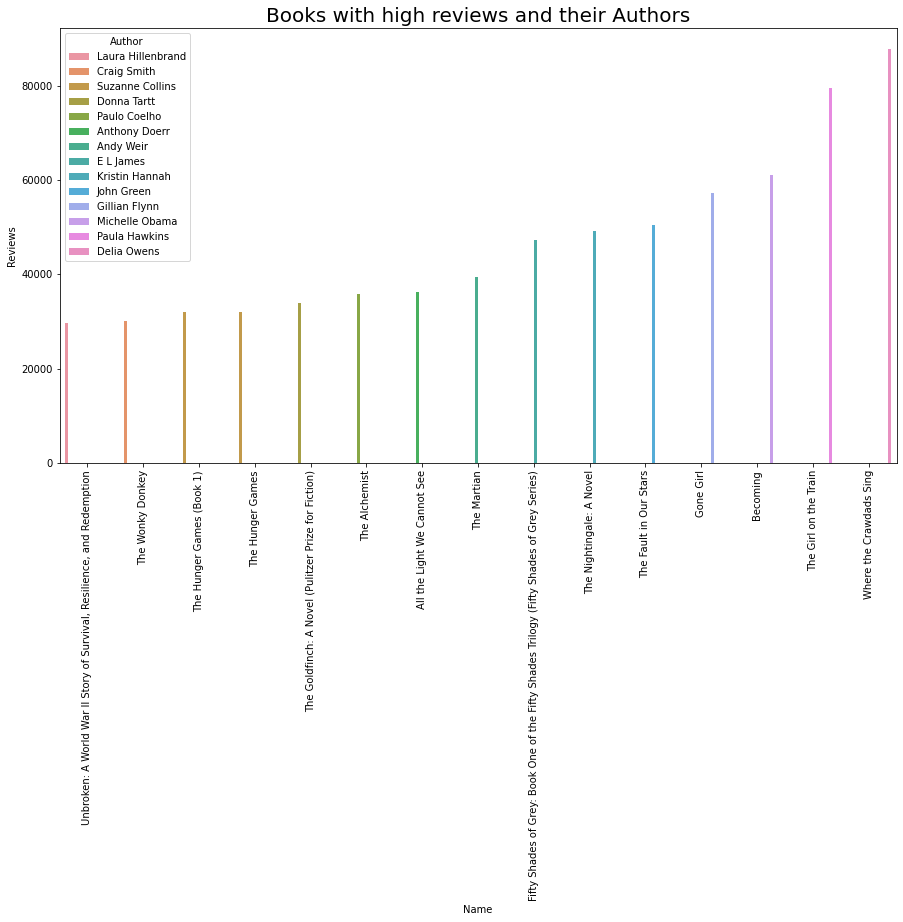

In [26]:
good_review =df[['Name','Reviews','Author']].sort_values(by = 'Reviews')[-30:].reset_index()
plt.figure(figsize=(15,8))
sns.barplot(hue=good_review['Author'],x=good_review['Name'],y=good_review['Reviews'])
plt.xticks(rotation=90)
plt.title('Books with high reviews and their Authors',fontsize=20)
plt.show()

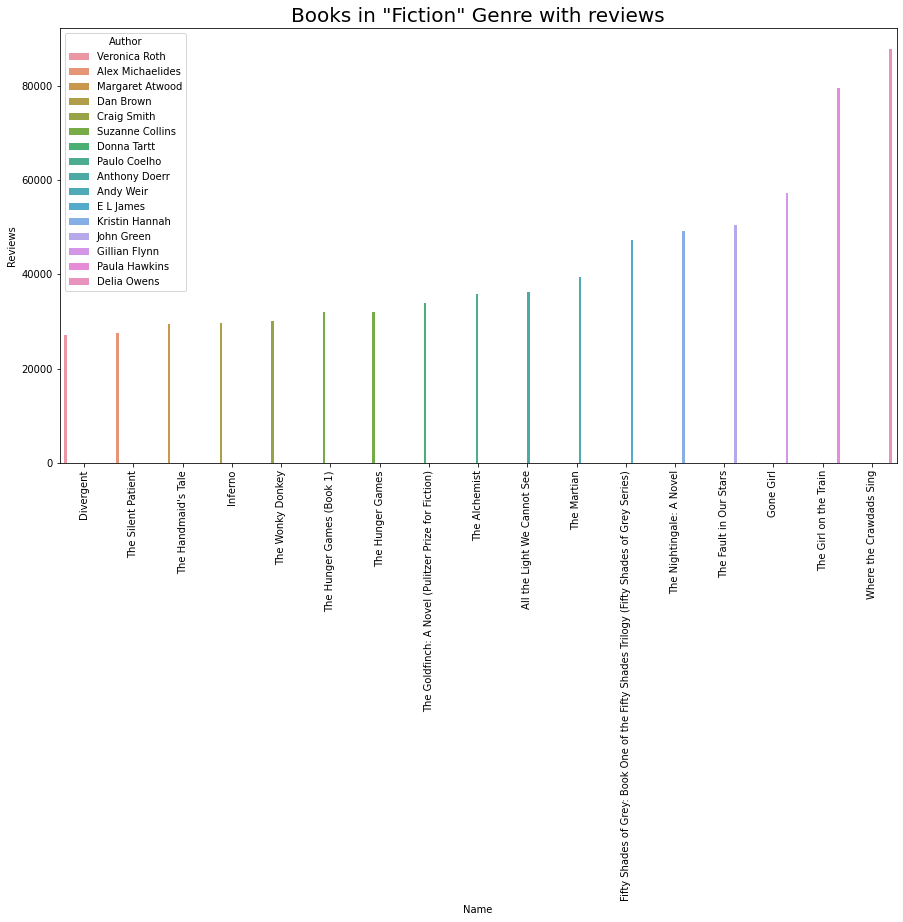

In [27]:
genre_fiction=df[df['Genre']=='Fiction']
high=genre_fiction[['Author','Name','Reviews']].sort_values('Reviews')[-30:].reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=high['Name'],y=high['Reviews'],hue=high['Author'])
plt.title('Books in "Fiction" Genre with reviews',fontsize=20)
plt.xticks(rotation=90)
plt.show()

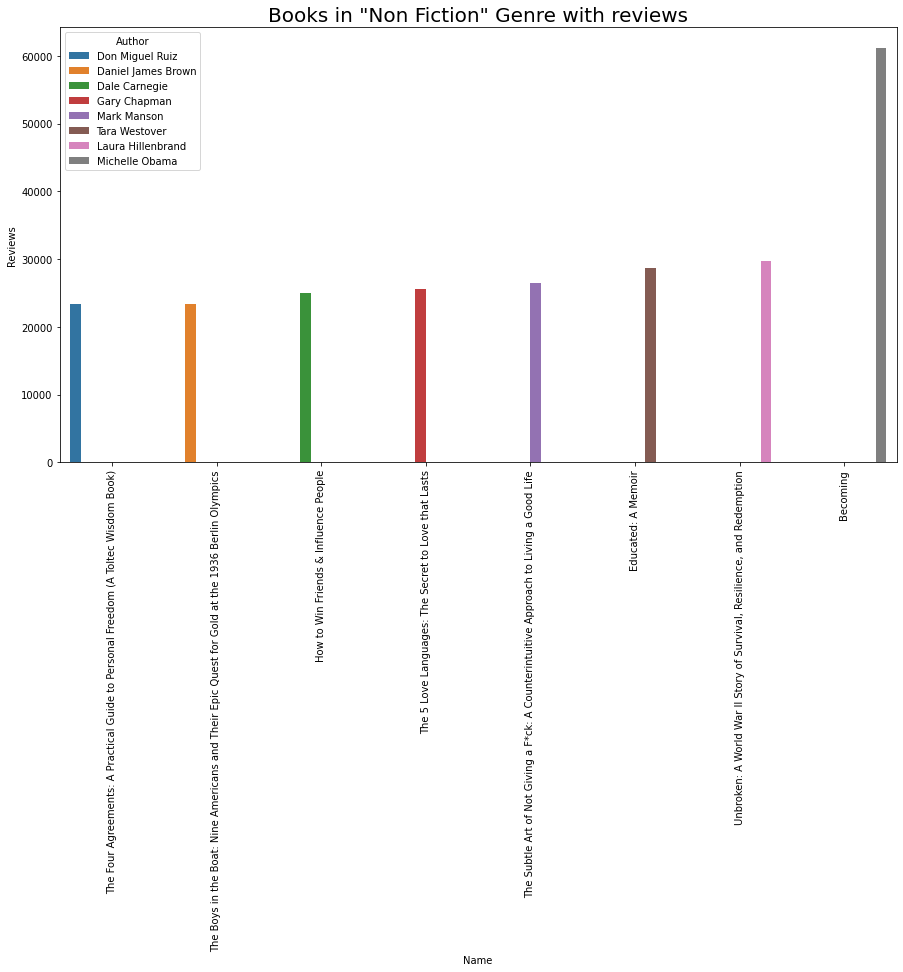

In [28]:
genre_non_fiction=df[df['Genre']=='Non Fiction']
high=genre_non_fiction[['Author','Name','Reviews']].sort_values('Reviews')[-30:].reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=high['Name'],y=high['Reviews'],hue=high['Author'])
plt.title('Books in "Non Fiction" Genre with reviews',fontsize=20)
plt.xticks(rotation=90)
plt.show()